In [1181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Import Dataset

In [1182]:
customer_data = pd.read_csv('/Users/victor/Google Drive/Python and Data Science/projects/Telco Customer Churn/Input-Telco-Customer-Churn.csv')
customer_data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2750,1179-INLAT,Male,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.45,69.25,No
2274,0320-JDNQG,Male,0,Yes,Yes,23,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,99.85,2331.3,Yes
1272,1257-SXUXQ,Male,0,Yes,Yes,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.45,86.05,No
4435,5453-AXEPF,Male,0,Yes,No,17,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),80.50,1336.9,No
499,7783-YKGDV,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),99.70,1238.45,Yes


In [1183]:
# Standarize column names
customer_data.columns = customer_data.columns = [
    'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn']
customer_data.sample(5)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
4883,5233-GEEAX,Male,1,No,No,8,No,No phone service,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.40,221.9,Yes
1613,3374-PZLXD,Male,0,No,No,34,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.70,675.6,No
6284,2985-FMWYF,Female,0,No,No,23,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.50,2341.55,No
2467,6559-RAKOZ,Male,0,Yes,Yes,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,97.95,4917.9,No
5279,0394-YONDK,Male,0,Yes,Yes,70,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.15,1790.15,No


**View data types and columns**

In [1184]:
customer_data.dtypes

customer_id           object
gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges         object
churn                 object
dtype: object

In [1185]:
# Total charges column must be converted to double, missing values replaced
customer_data['total_charges'] = customer_data['total_charges'].str.replace(' ','0')
customer_data['total_charges'] = customer_data['total_charges'].astype(float)

In [1186]:
customer_data.describe().round(2)

,senior_citizen,tenure,monthly_charges,total_charges
count,7043.00,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76,2279.73
std,0.37,24.56,30.09,2266.79
min,0.00,0.00,18.25,0.00
25%,0.00,9.00,35.50,398.55
50%,0.00,29.00,70.35,1394.55
75%,0.00,55.00,89.85,3786.60
max,1.00,72.00,118.75,8684.80


### Feature Value Counts

Plot value counts for each object column

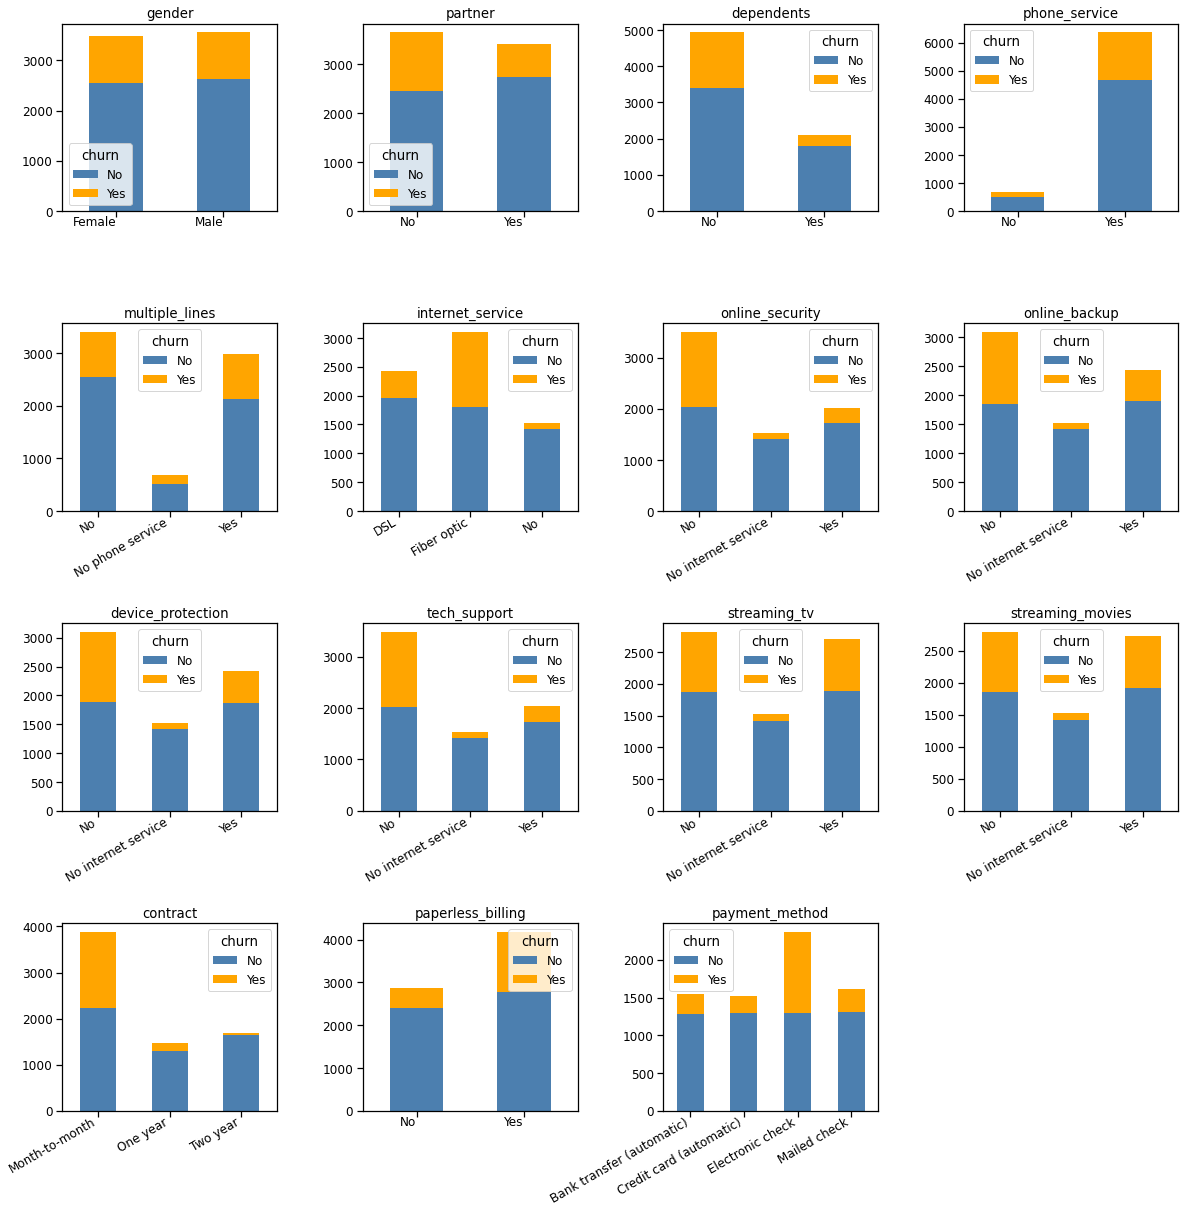

In [1187]:
sns.set_context('notebook',font_scale=1.1)

# Select object columns only
str_cols = list(customer_data.select_dtypes(object).columns)
str_cols.remove('customer_id') 
str_cols.remove('churn') 

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for i,col in enumerate(str_cols):
    
    ax = fig.add_subplot(4, 4, i+1)
    
    plot_data = customer_data.groupby([col,'churn'])[['churn']].count()\
    .rename(columns={'churn':'count'}).reset_index()\
    .pivot(columns='churn',values='count',index=col)\
    .plot.bar(stacked=True,color=['#4c7faf','orange'],ax=plt.gca())
    
    ax.set_title(col)
    ax.set_ylabel("")
    ax.set_xlabel("")
    
    # Rotate labels if values are longer than 3 values
    if len(customer_data[col].unique())>=3:
        ax.set_xticklabels(ax.get_xticklabels(),rotation=30,va='center_baseline',ha='right')
    else: 
        ax.set_xticklabels(ax.get_xticklabels(),rotation=0,va='center_baseline',ha='right')
    
plt.show()

We notice churn values are imbalanced, with most values being No

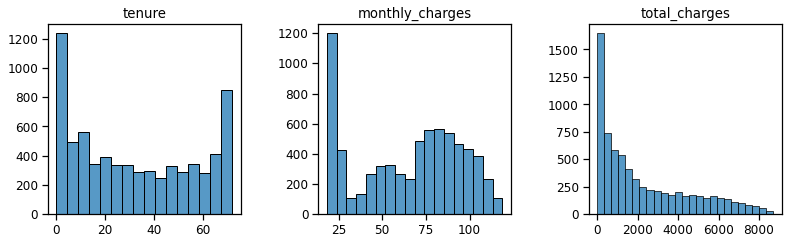

In [1188]:
# Select object columns only
num_cols = list(customer_data.select_dtypes(int).columns) + list(customer_data.select_dtypes(float).columns)
num_cols.remove('senior_citizen')
fig = plt.figure(figsize=(18,3.5))
fig.subplots_adjust(hspace=0.8, wspace=0.4)

for i,col in enumerate(num_cols):
    
    ax = fig.add_subplot(1, 4, i+1)
    sns.histplot(x = customer_data[col]) # Limit number of characters to 10 (easier to display)
    ax.set_title(col)
    ax.set_ylabel("")
    ax.set_xlabel("")
    
plt.show()

Group by churn flag and view statistics

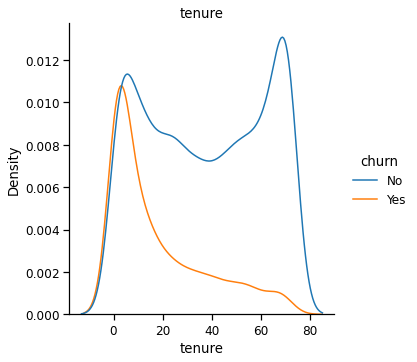

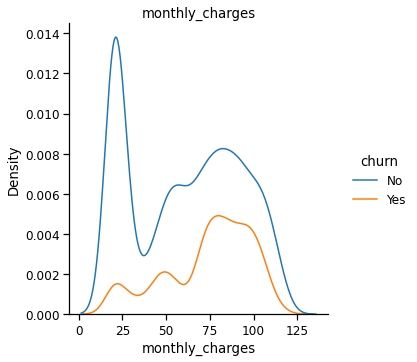

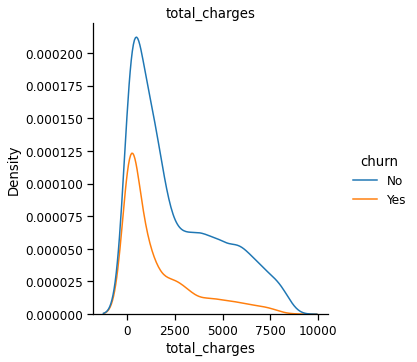

In [1189]:
for col in num_cols:
    sns.displot(data=customer_data, x=col, hue='churn', kind='kde')
    plt.title(col)
    plt.show()

# Predict Churn

### Preprocessing

In [1190]:
from sklearn.preprocessing import OneHotEncoder

# Target variable
customer_data['churn'] = [1  if value=='Yes' else 0 for value in customer_data['churn']]

# Encode multi-category columns 
X = customer_data[['payment_method','contract','internet_service']] # Columns to perform encoding
encoder = OneHotEncoder()
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoder.fit_transform(columns),
                                               columns=encoder.get_feature_names(X.columns)
                                              )

# Add encoded columns to dataset
customer_data = pd.concat([customer_data, encoded_df], axis=1)

# Remove original columns
customer_data.drop(columns=['payment_method','contract','internet_service'],inplace=True)

# These columns will be transformed into binary dummy columns since they only have 2 possible values each ("y/n")
subset_to_replace = ['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines',
                     'online_security', 'online_backup', 'device_protection', 'tech_support',
                     'streaming_tv', 'streaming_movies', 'paperless_billing']

# We'll also remove redundant flags like "No internet service" since they are already represented in other features
customer_data[subset_to_replace] = customer_data[subset_to_replace].replace({'Yes':1,
                                                                             'No internet service':0,
                                                                             'No phone service':0,
                                                                             'Female':0,
                                                                             'Male':1,
                                                                             'No':0
                                                                            }
                                                                            )


customer_data.sample(5)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,contract_Month-to-month,contract_One year,contract_Two year,internet_service_DSL,internet_service_Fiber optic,internet_service_No
5261,1409-PHXTF,1,1,1,0,54,1,1,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5723,7824-PANSQ,1,0,0,0,58,1,1,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5949,8756-RDDLT,0,0,0,0,68,0,0,0,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2104,3106-ULWFW,0,0,1,0,8,1,1,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6138,4833-QTJNO,1,1,1,0,67,1,1,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [1191]:
# View feature means
customer_data.groupby('churn').mean().transpose().round(3)

churn,0,1
gender,0.507,0.498
senior_citizen,0.129,0.255
partner,0.528,0.358
dependents,0.345,0.174
tenure,37.570,17.979
phone_service,0.901,0.909
multiple_lines,0.410,0.455
online_security,0.333,0.158
online_backup,0.368,0.280
device_protection,0.363,0.292


In [1192]:
# Drop collinear columns
customer_data.drop(columns=[
    'internet_service_Fiber optic',
    'internet_service_DSL',
    'contract_Two year'
],
                   inplace=True)

### Logistic Regression

In [1193]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

# Specify transformations for each dtype
ct = make_column_transformer(
    (MinMaxScaler(),make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(),make_column_selector(dtype_include=object))
)

# Create pipeline
pipe = make_pipeline(ct, LogisticRegression(class_weight='balanced'))

# Train test split
X = customer_data.drop(columns=['customer_id','churn'])
y = customer_data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Train and predict test
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Coefficients

In [1194]:
probabilites = X_test.copy()
probabilites[["churn_no","churn_yes"]] = pipe.predict_proba(X_test)
probabilites.sample(5)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,contract_Month-to-month,contract_One year,internet_service_No,churn_no,churn_yes
1380,1,0,1,1,61,1,0,0,1,0,...,6145.20,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.762526,0.237474
2948,1,1,1,0,41,1,1,0,0,1,...,4259.30,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.175855,0.824145
6940,0,0,1,1,72,0,0,1,1,1,...,3880.05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.980085,0.019915
939,0,0,0,0,15,1,0,0,0,0,...,320.45,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.737739,0.262261
1451,1,0,0,0,18,1,1,1,0,1,...,1199.40,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.552724,0.447276


### Metrics 

Accuracy Score:  0.708
Balanced Accuracy Score:  0.748


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


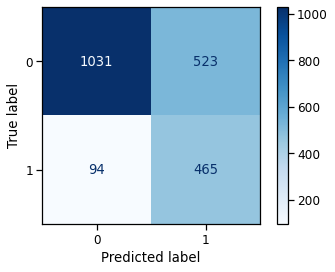

In [1204]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import balanced_accuracy_score

acc_score = accuracy_score(y_test,y_pred)
print('Accuracy Score: ', round(acc_score,3))

balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
print('Balanced Accuracy Score: ', round(balanced_accuracy,3))

plot_confusion_matrix(pipe, X_test, y_test,cmap='Blues')
plt.show()

### Logistic Regression Statsmodels Implementation

In [1196]:
import statsmodels.discrete.discrete_model as sm

logit = sm.Logit(y_train, X_train)
fit = logit.fit()
fit.summary()

Optimization terminated successfully.
         Current function value: 0.413126
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4907
Method:                           MLE   Df Model:                           22
Date:                Thu, 11 Feb 2021   Pseudo R-squ.:                  0.2872
Time:                        12:21:07   Log-Likelihood:                -2036.7
converged:                       True   LL-Null:                       -2857.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
gender                                      -0.0043      0.078     -0.055      0.956      -0.157       0.148
senior_citizen                               0.2328      0.101      2.301      0.021       0.035       0.431
partner                                     -0.0124      0.093     -0.133      0.894      -0.195       0.170
dependents                                  -0.2462      0.106     -2.322      0.020      -0.454      -0.038
tenure                                      -0.0535      0.007     -7.494      0.000      -0.068      -0.040
phone_service                               -1.3946      0.211     -6.607      0.000      -1.808      -0.981
multiple_lines                               0.0581      0.100      0.584      0.559      -0.137       0.253
online_security                             -0.5297      0.100     -5.277      0.000      -0.726      -0.333
online_backup                               -0.3384      0.094     -3.615      0.000      -0.522      -0.155
device_protection                           -0.2024      0.099     -2.051      0.040      -0.396      -0.009
tech_support                                -0.5880      0.102     -5.752      0.000      -0.788      -0.388
streaming_tv                                -0.2143      0.109     -1.973      0.049      -0.427      -0.001
streaming_movies                            -0.1638      0.108     -1.519      0.129      -0.375       0.048
paperless_billing                            0.3594      0.089      4.017      0.000       0.184       0.535
monthly_charges                              0.0334      0.005      7.046      0.000       0.024       0.043
total_charges                                0.0002   8.21e-05      3.024      0.002    8.74e-05       0.000
payment_method_Bank transfer (automatic)    -1.9121      0.320     -5.974      0.000      -2.539      -1.285
payment_method_Credit card (automatic)      -2.0803      0.320     -6.501      0.000      -2.708      -1.453
payment_method_Electronic check             -1.7320      0.313     -5.526      0.000      -2.346      -1.118
payment_method_Mailed check                 -2.1261      0.306     -6.959      0.000      -2.725      -1.527
contract_Month-to-month                      1.4020      0.213      6.589      0.000       0.985       1.819
contract_One year                            0.8093      0.212      3.812      0.000       0.393       1.225
internet_service_No                          0.0761      0.234      0.326      0.745      -0.382       0.534
============================================================================================================
"""

In [1197]:
fit.pvalues[fit.pvalues<=0.05]

senior_citizen                              2.137942e-02
dependents                                  2.024446e-02
tenure                                      6.680784e-14
phone_service                               3.911989e-11
online_security                             1.314591e-07
online_backup                               2.998764e-04
device_protection                           4.023680e-02
tech_support                                8.800696e-09
streaming_tv                                4.854237e-02
paperless_billing                           5.900033e-05
monthly_charges                             1.847702e-12
total_charges                               2.491148e-03
payment_method_Bank transfer (automatic)    2.320643e-09
payment_method_Credit card (automatic)      8.000534e-11
payment_method_Electronic check             3.276470e-08
payment_method_Mailed check                 3.429975e-12
contract_Month-to-month                     4.429369e-11
contract_One year              

### Random Forest

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Accuracy Score:  0.708
Balanced Accuracy Score:  0.748


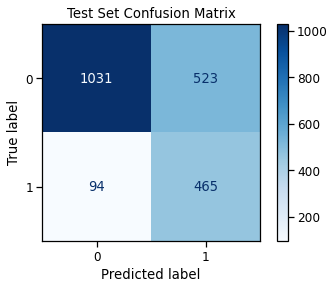

In [1201]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, 
                             random_state=0,
                             class_weight='balanced'
                            )

# Create pipeline
pipe = make_pipeline(ct, clf)

# Train test split
X = customer_data.drop(columns=['customer_id','churn'])
y = customer_data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Train and predict test
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

# Report metrics
acc_score = accuracy_score(y_test,y_pred)
print('Accuracy Score: ', round(acc_score,3))

balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
print('Balanced Accuracy Score: ', round(balanced_accuracy,3))

plot_confusion_matrix(pipe, X_test, y_test,cmap='Blues')
plt.title('Test Set Confusion Matrix')
plt.show()

[Text(558.0, 453.0, 'monthly_charges <= 0.089\ngini = 0.5\nsamples = 3127\nvalue = [2439.124, 2536.504]\nclass = Yes'),
 Text(279.0, 271.8, 'total_charges <= 0.007\ngini = 0.356\nsamples = 722\nvalue = [697.282, 210.748]\nclass = No'),
 Text(139.5, 90.59999999999997, 'gini = 0.476\nsamples = 137\nvalue = [91.246, 143.008]\nclass = Yes'),
 Text(418.5, 90.59999999999997, 'gini = 0.181\nsamples = 585\nvalue = [606.036, 67.74]\nclass = No'),
 Text(837.0, 271.8, 'contract_One year <= 0.5\ngini = 0.49\nsamples = 2405\nvalue = [1741.843, 2325.756]\nclass = Yes'),
 Text(697.5, 90.59999999999997, 'gini = 0.472\nsamples = 1923\nvalue = [1296.508, 2099.954]\nclass = Yes'),
 Text(976.5, 90.59999999999997, 'gini = 0.447\nsamples = 482\nvalue = [445.334, 225.802]\nclass = No')]

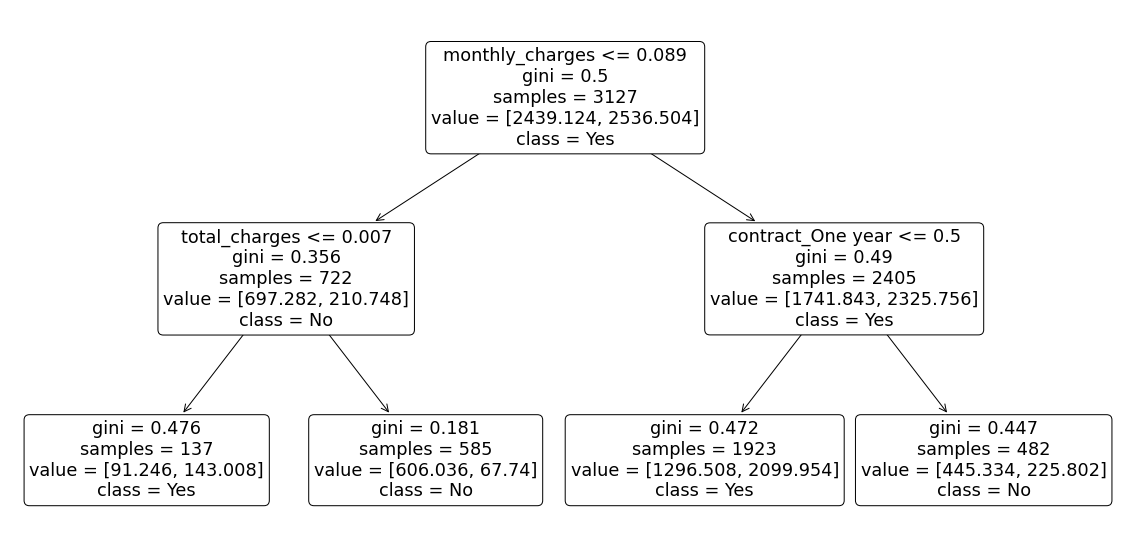

In [1202]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(pipe['randomforestclassifier'].estimators_[7],
               feature_names=list(X.columns),
               class_names = ['No','Yes'],
               rounded = True
              )